In [106]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
with open('../results/2022-11-02_18:08:30_results.json') as f:
    data = json.load(f)

In [108]:
for d in data:
    results = d['results']
    configs = d['configs']
    
    r2 = results['total']['r2score_val']
    r2_train = results['total']['r2score_train']
    print('train', '{0:.4}'.format(np.mean(r2_train)) + '\\pm {0:.3}'.format(np.std(r2_train)))
    print('val', '{0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}'.format(np.std(r2)))

train 0.9891\pm 0.00116
val 0.9704\pm 0.00042
train 0.9201\pm 0.131
val 0.9134\pm 0.128
train 0.9142\pm 0.128
val 0.913\pm 0.128
train 0.6587\pm 0.000215
val 0.6586\pm 0.00106
train 0.6588\pm 0.000285
val 0.6587\pm 0.00103
train 0.6587\pm 0.000229
val 0.6586\pm 0.000995


In [109]:
def getinfo(obj):
    infotoformat = {4: {}, 5: {}, 6: {}}
    for d in data:
        results = d['results']
        configs = d['configs']

        r2 = results['by_response'][obj]['r2score_val']

        infotoformat[
            configs['depth']
        ][configs['width']] = '${0:.4}'.format(np.mean(r2)) + '\\pm {0:.3}$'.format(np.std(r2))
    
    return infotoformat

In [110]:
def formatinfo(vals, obj):
    print('''
        \\begin{table*}[htp!]
        \centering
         \\begin{tabular}{|c |c c c|} 
         \hline
         & Depth 4 & Depth 5 & Depth 6 \\\\
         \hline
         Width 50 & %s & %s & %s \\\\
         Width 75 & %s & %s & %s \\\\
         Width 100 & %s & %s & %s \\\\
         \hline
         \end{tabular}
         \caption{\label{tab:valr2}Aggregated validation set $R^2$ scores.}
        \end{table*}
    ''' % tuple(vals[depth][width] for depth in [4, 5, 6] for width in [50, 75, 100]))

In [111]:
def maketable(obj):
    vals = getinfo(obj)
    formatinfo(vals, obj)

In [52]:
for i in [1, 2, 3, 4, 5, 6]:
    maketable(f'OBJ{i}')

KeyError: 50

In [53]:
def compute_color(depth, width, alpha=1.):
    orange = (0.8, 0.3, 0.1)
    green = (0.4, 0.8, 0.4)
    blue = (0.1, 0.2, 0.8)
    #purple = (0.4, 0.1, 0.3)
    main = orange
    if width == 100:
        main = orange
    if width == 150:
        main = green
    if width == 200:
        main = blue
    return (*main, alpha*(.32*(depth-6)+0.85))

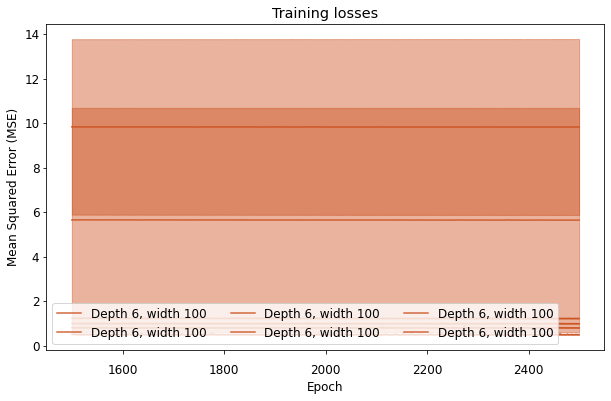

In [55]:

fig, ax = plt.subplots(1, 1, figsize=(10,6))
epochs = list(range(1500, 2500))

plt.rc('font', **{'size': 12})

for d in data:
    depth = d['configs']['depth']
    width = d['configs']['width']
    losses = d['results']['total']['training_losses']
    means = np.mean(losses, axis=0)[-1000:]
    ax.plot(
        epochs, np.mean(d['results']['total']['training_losses'], axis=0)[-1000:],
        color=compute_color(depth, width),
        label=f'Depth {depth}, width {width}'
    )
    stds = np.std(losses, axis=0)[-1000:]
    ax.fill_between(epochs, means-stds, means+stds, color=compute_color(depth, width, alpha=0.5), edgecolor="none")
    
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
#plt.legend(bbox_to_anchor=(1.,0.5), ncol=3, loc='upper left')
plt.legend(ncol=3, loc='lower left')
ax.set_title('Training losses')
# plt.subplots_adjust(right=.2)
plt.savefig('training_losses.png', dpi=400)
plt.show()

In [112]:
paper_mapes = {
    'OBJ1': 0.017,
    'OBJ2': 0.018,
    'OBJ3': 0.013,
    'OBJ4': 0.048,
    'OBJ5': 0.117,
    'OBJ6': 0.115,
}

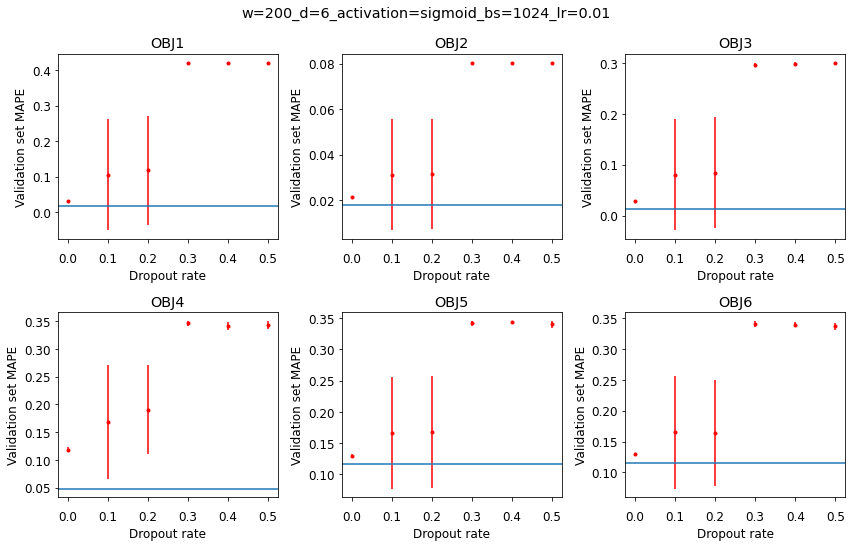

In [115]:
# mapes
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i in range(1, 7):
    ax = axs.flatten()[i-1]
    ax.axhline(paper_mapes[f'OBJ{i}'], label='MAPE from paper')
    ax.set_title(f'OBJ{i}')
    ax.set_xlabel('Dropout rate')
    ax.set_ylabel('Validation set MAPE')

for d in data:
    configs = d['configs']
    results = d['results']
    dropout_rate = configs['dropout_rate']
    if dropout_rate > 0.7:
        continue
    else:
        for i in range(1, 7):
            ax = axs.flatten()[i-1]

            obj_results = results['by_response'][f'OBJ{i}']
            train_mean = np.mean(obj_results['mape_train'])
            train_std = np.std(obj_results['mape_train'])
            val_mean = np.mean(obj_results['mape_val'])
            val_std = np.std(obj_results['mape_val'])

            ax.errorbar(dropout_rate, val_mean, yerr=val_std, fmt='.', color='r')
   
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('w=200_d=6_activation=sigmoid_bs=1024_lr=0.01')
plt.show()

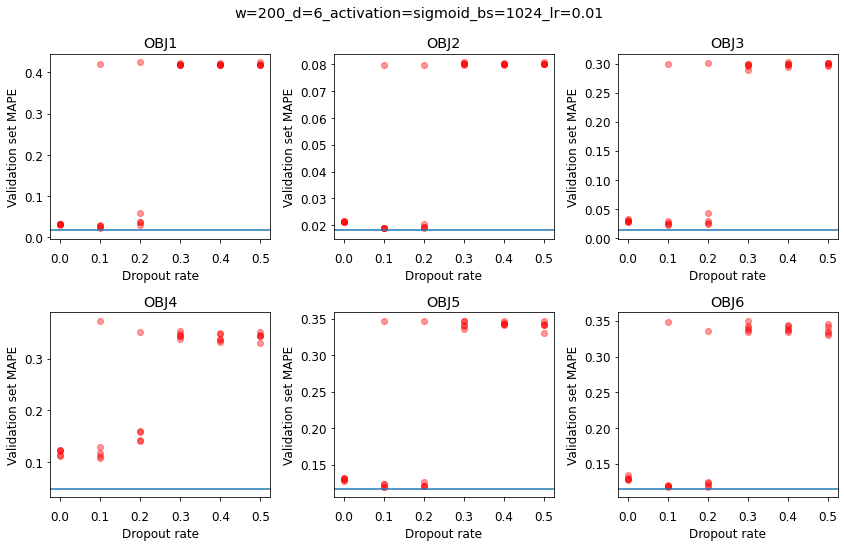

In [123]:
# mapes
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i in range(1, 7):
    ax = axs.flatten()[i-1]
    ax.axhline(paper_mapes[f'OBJ{i}'], label='MAPE from paper')
    ax.set_title(f'OBJ{i}')
    ax.set_xlabel('Dropout rate')
    ax.set_ylabel('Validation set MAPE')

for d in data:
    configs = d['configs']
    results = d['results']
    dropout_rate = configs['dropout_rate']
    if dropout_rate > 0.75:
        continue
    else:
        for i in range(1, 7):
            ax = axs.flatten()[i-1]

            obj_results = results['by_response'][f'OBJ{i}']
            mape_val = obj_results['mape_val']

            ax.scatter([dropout_rate]*5, mape_val, color='r', alpha=0.4)
   
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('w=200_d=6_activation=sigmoid_bs=1024_lr=0.01')
plt.show()

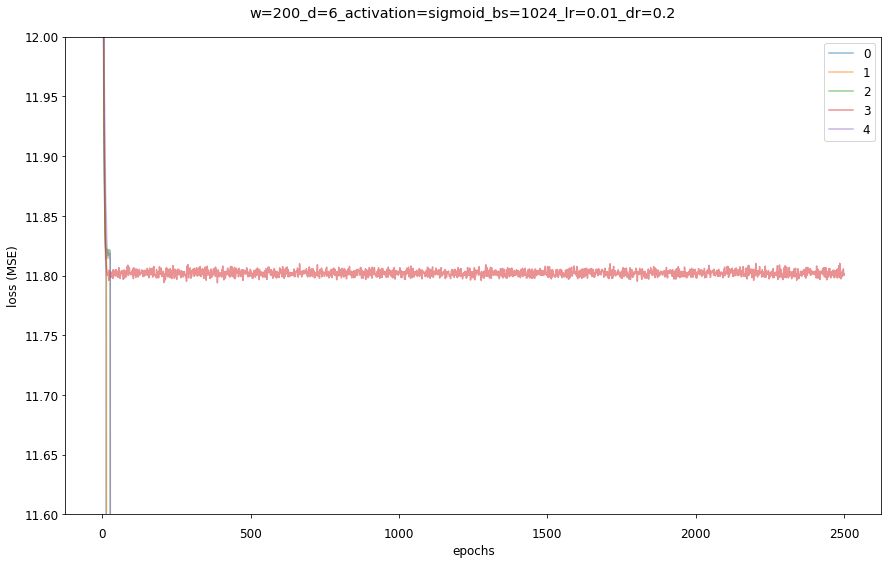

In [151]:
# mapes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for d in data:
    configs = d['configs']
    results = d['results']
    dropout_rate = configs['dropout_rate']
    if dropout_rate == 0.2:
        training_losses = results['total']['training_losses']

        for fold_id in range(5):
            ax.plot(np.arange(1, 2501), training_losses[fold_id], alpha=0.5, label=fold_id)

plt.legend()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('w=200_d=6_activation=sigmoid_bs=1024_lr=0.01_dr=0.2')
ax.set_xlabel('epochs')
ax.set_ylabel('loss (MSE)')
ax.set_ylim(11.6, 12.)
plt.show()